In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%run utils/stat_helper_functions

packages imported


In [4]:
# read file
path = '/Users/mehipour/Desktop/data/'
file_path = path + 'R_lung_data_24-Sep-2020-poly4.csv'
df = pd.read_csv(file_path)

# remove space from column names and values
df.columns = df.columns.str.lstrip()
df['cohort'] = df['cohort'].str.lstrip()

# reivew data
df.head()

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total,chi_sq,r_squred
0,20,Perfused,38.8500,234.5206,0.6266,214.0279,1437.4240,1.0000,1.0000,-212.4455,0.9543
1,20,Perfused,89.4167,194.6505,0.6604,215.3330,1236.7653,0.8250,0.9647,-124.8434,0.9262
2,20,Perfused,107.7833,194.5241,0.6387,246.9015,1235.6868,0.7190,0.9649,-95.1956,0.9276
3,20,Perfused,125.0500,167.0442,0.5835,269.8537,1291.7763,0.5649,0.7926,1344.3731,0.8989
4,20,Perfused,142.5333,179.2314,0.6085,282.4541,1353.8072,0.5791,0.8114,-167.2632,0.9201


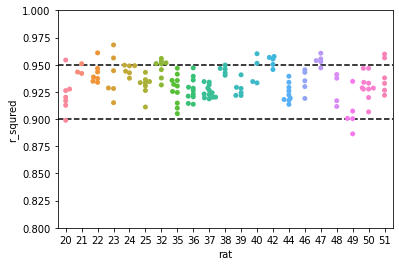

In [3]:
# check fit quality for rats
sns.swarmplot(x='rat', y='r_squred', size=5, data=df)
plt.axhline(0.95, ls='--', c=[0,0,0])
plt.axhline(0.9, ls='--', c=[0,0,0])
plt.ylim([0.8, 1.0])
plt.show()

In [91]:
# apply linear regression for each rat to get atp2pi, atp2total and ec slopes
lm_total = LinearRegression()
lm_pi = LinearRegression()
lm_ec = LinearRegression()

# get weights
rats = df['rat'].unique()
df_summary = pd.DataFrame(columns=['cohort', 'slope_atp2total', 'intercept_atp2total',
                                   'slope_atp2pi', 'intercept_atp2pi', 'slope_ec', 'intercept_ec'], index=rats)

df_goodfits = df[df['r_squred'] > 0.8]

# linear regression
for rat in rats:
    # time
    df_rat = df_goodfits[df_goodfits['rat'] == rat]
    t_hr = df_rat['t_min'].values.reshape(-1,1)/60
    # atp2total
    y = df_rat['atp2total'].values.reshape(-1,1)
    lm_total.fit(t_hr,y)
    # atp2pi
    y = df_rat['atp2pi'].values.reshape(-1,1)
    lm_pi.fit(t_hr,y)
    # ec
    y = df_rat['ec'].values.reshape(-1,1)
    lm_ec.fit(t_hr,y)
    cohort = df[df['rat']==rat]['cohort'].unique()[0]
    df_summary.loc[rat] = [cohort,
                           -lm_total.coef_[0][0], lm_total.intercept_[0],
                           -lm_pi.coef_[0][0], lm_pi.intercept_[0],
                           -lm_ec.coef_[0][0], lm_ec.intercept_[0]] 
df_summary.head()

,cohort,slope_atp2total,intercept_atp2total,slope_atp2pi,intercept_atp2pi,slope_ec,intercept_ec
20,Perfused,0.116204,1.10186,0.219262,1.11629,0.0186641,0.656624
21,Perfused,0.0438805,1.02605,0.203782,1.11059,-0.0433101,0.585242
22,Perfused,0.0405277,0.996175,0.148618,0.954085,-0.00688066,0.633569
23,Cold,0.0301034,1.03476,0.109601,0.993464,-0.00442482,0.603104
24,Cold,0.186341,1.19177,0.24288,1.06402,0.0604179,0.7142


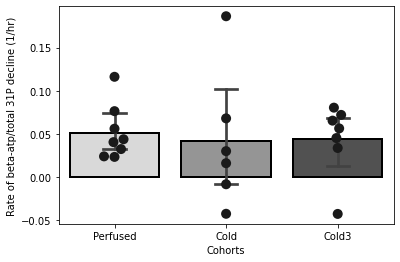

In [92]:
# show barplots for atp2total
ax = sns.barplot(x='cohort', y='slope_atp2total', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2total',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

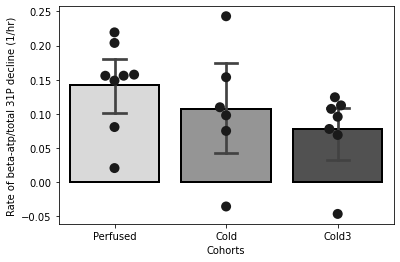

In [93]:
# show barplots for atp2pi
ax = sns.barplot(x='cohort', y='slope_atp2pi', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2pi',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

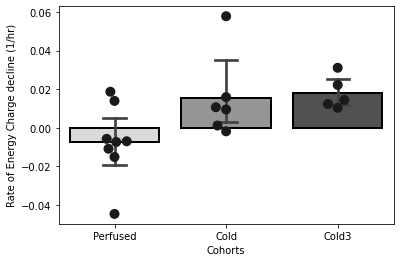

In [78]:
# show barplots for ec
ax = sns.barplot(x='cohort', y='slope_ec', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_ec',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of Energy Charge decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

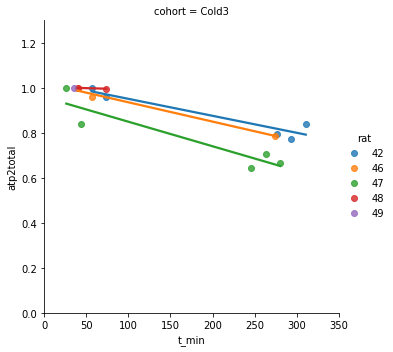

In [68]:
# look at individual decline of atp2total vs time for each group:
df_cold3 = df_goodfits[df_goodfits.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2total',
           hue='rat', col='cohort', ci=None, data=df_cold3)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()

In [69]:
df_cold3

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total,chi_sq,r_squred
103,42,Cold3,56.4333,257.2049,0.7218,307.5608,1787.9071,1.0000,1.0000,-0.1329,0.9567
104,42,Cold3,73.5833,233.5081,0.6517,350.5170,1691.0592,0.7966,0.9599,-0.0947,0.9576
105,42,Cold3,276.4833,193.8288,0.6026,377.8082,1690.7061,0.6135,0.7969,-0.0489,0.9503
106,42,Cold3,293.6333,196.9166,0.5870,399.1610,1770.4878,0.5899,0.7731,0.3488,0.9552
107,42,Cold3,310.7833,222.9995,0.6173,436.2645,1841.5882,0.6112,0.8417,-0.1593,0.9456
108,46,Cold3,39.6333,197.9844,0.6630,131.1762,1130.6208,1.0000,1.0000,-0.0588,0.9430
109,46,Cold3,56.7833,203.3526,0.6837,184.4218,1209.6396,0.7306,0.9600,-0.3686,0.9453
110,46,Cold3,274.0333,171.5665,0.6066,255.7181,1243.7888,0.4445,0.7877,-0.1119,0.9352
113,47,Cold3,26.2667,164.0293,0.5716,355.4831,1501.8025,1.0000,1.0000,1.5337,0.9528
114,47,Cold3,43.4333,149.9910,0.5433,451.5426,1633.5131,0.7199,0.8407,0.8992,0.9471


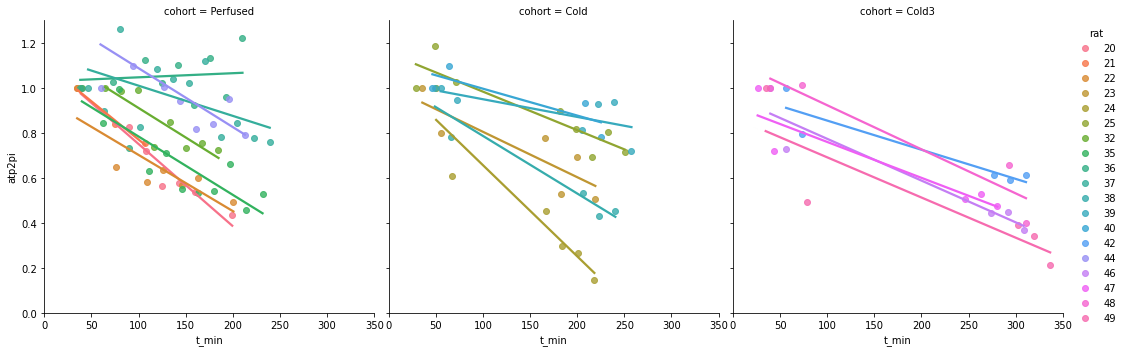

In [73]:
# look at individual decline of atp2pi vs time for each group:
df_cold3 = df[df.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2pi',
           hue='rat', col='cohort', ci=None, data=df)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()